In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Implementation - Modelling Intensity Fluctuations of Rayleigh Backscattered Coherent Light in Single-Mode Fibers

Here, we want to implement this equation:
$$ E_b (z = 0, k) = E_0 C A \sum_{i = 1}^N E_i $$
where
$$ E_i = \exp(j2\phi_{i-1}) \int_{d/2}^{-d/2} \exp(-\alpha(l + z_i) - j 2 \bar{n}_i k l)dl$$
and 
$$ \phi = \phi_{i - 1} + \bar{n}_i kd.$$
- $\alpha$, `α`: power attenuation coefﬁcient of the ﬁber
- $E_0$, `E_0`: launched ﬁeld
- $C$, `C`: average backscattering ﬁeld coefﬁcient
- $A$, `A`: mode ﬁeld effective area

In [2]:
α = 0.2     # db / km
E_0 = 1     # V / m
C = 70      # um^2
A = 2.13    # um^-2

We modelise the variation of the refractive index in the fiber as
$$ \bar{n}_i = 1.44 + \xi_i 10^{-7}. $$
in segments of $d = 1$ cm, where $\xi_i$ is a uniformly distributed random variable in $[0, 1]$. On pose une fibre de 1 km and $\phi_0 = 0$.

In [3]:
FIBER_LENGTH = 1e3              # 1 km
AVERAGE_SEGMENT_SIZE = 1e-2     # 1 cm

number_of_segments = int(FIBER_LENGTH / AVERAGE_SEGMENT_SIZE)

n_bar = 1.44 + 1e-7 * np.random.rand(number_of_segments)

phi_i = np.zeros(number_of_segments + 1)
phi_i[1:] = np.cumsum(n_bar)

We can resolve analyticaly the integral to find
$$
\int_{-\mathrm{d} / 2}^{\mathrm{d} / 2} \exp \left(-\alpha\left(l+z_i\right)-j 2 \bar{n}_i k l\right) d l = \frac{2 \exp(-\alpha z_i) \sinh(\frac{d}{2} (\alpha + j 2 \bar{n}_i k))}{\alpha + j 2 \bar{n}_i k}
$$

In [4]:
d = np.ones_like(n_bar) * 1e-2  # segments of 1 cm
z = np.cumsum(d)
k = 2 * np.pi / 1.55e-6

E_i = np.exp(1j * 2 * phi_i[:-1]) * 2 * np.exp(-α * z) * np.sinh(d / 2 * (α + 1j * 2 * n_bar * k)) / (α + 1j * 2 * n_bar * k)

On simule ensuite l'impact du pulse et de la détection.

In [5]:
pulse_width_points = 20         # points

E_ip = np.convolve(E_i, np.ones(pulse_width_points))    
I_b = E_0 * C * A * E_i

/Users/louisbelangersansoucy/source/SS-Rayleigh/.venv/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/louisbelangersansoucy/source/SS-Rayleigh/.venv/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


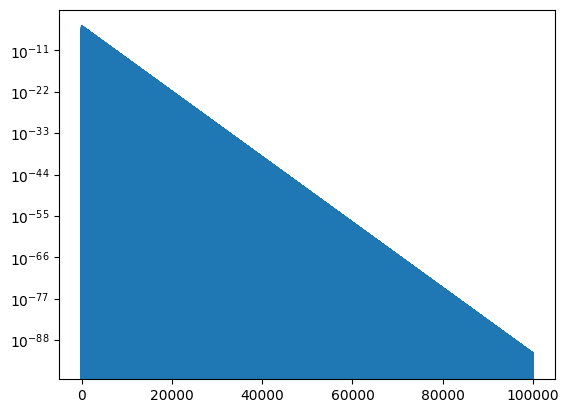

In [7]:
plt.plot(I_b)

plt.yscale("log")